In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
%matplotlib inline

In [ ]:
loc1 = '../data/train'
loc2 = '../data/val'

In [3]:
dish = os.listdir(loc1)
dish

['aloo_gobi',
 'aloo_matar',
 'aloo_methi',
 'aloo_paratha',
 'aloo_shimla_mirch',
 'aloo_tikki',
 'amritsari_kulcha',
 'anda_curry',
 'ariselu',
 'balushahi',
 'banana_chips',
 'bandar_laddu',
 'basundi',
 'besan_laddu',
 'bhindi_masala',
 'biryani',
 'boondi',
 'boondi_laddu',
 'butter_chicken',
 'chaas',
 'chak_hao_kheer',
 'cham_cham',
 'chana_masala',
 'chapati',
 'chicken_pizza',
 'chicken_razala',
 'chicken_tikka',
 'chicken_tikka_masala',
 'chicken_wings',
 'chikki',
 'chivda',
 'chole_bhature',
 'daal_baati_churma',
 'daal_puri',
 'dabeli',
 'dal_khichdi',
 'dal_makhani',
 'dal_tadka',
 'dharwad_pedha',
 'dhokla',
 'double_ka_meetha',
 'dum_aloo',
 'falooda',
 'fish_curry',
 'gajar_ka_halwa',
 'garlic_bread',
 'gavvalu',
 'ghevar',
 'grilled_sandwich',
 'gujhia',
 'gulab_jamun',
 'hara_bhara_kabab',
 'idiyappam',
 'idli',
 'imarti',
 'jalebi',
 'kachori',
 'kadai_paneer',
 'kadhi_pakoda',
 'kaju_katli',
 'kakinada_khaja',
 'kalakand',
 'karela_bharta',
 'khakhra',
 'kheer',
 '

In [4]:
len(dish)

131

In [5]:
for i in dish:
    print(i)

aloo_gobi
aloo_matar
aloo_methi
aloo_paratha
aloo_shimla_mirch
aloo_tikki
amritsari_kulcha
anda_curry
ariselu
balushahi
banana_chips
bandar_laddu
basundi
besan_laddu
bhindi_masala
biryani
boondi
boondi_laddu
butter_chicken
chaas
chak_hao_kheer
cham_cham
chana_masala
chapati
chicken_pizza
chicken_razala
chicken_tikka
chicken_tikka_masala
chicken_wings
chikki
chivda
chole_bhature
daal_baati_churma
daal_puri
dabeli
dal_khichdi
dal_makhani
dal_tadka
dharwad_pedha
dhokla
double_ka_meetha
dum_aloo
falooda
fish_curry
gajar_ka_halwa
garlic_bread
gavvalu
ghevar
grilled_sandwich
gujhia
gulab_jamun
hara_bhara_kabab
idiyappam
idli
imarti
jalebi
kachori
kadai_paneer
kadhi_pakoda
kaju_katli
kakinada_khaja
kalakand
karela_bharta
khakhra
kheer
kofta
kulfi
lassi
ledikeni
litti_chokha
lyangcha
maach_jhol
makki_di_roti_sarson_da_saag
malpua
margherita_pizza
masala_dosa
masala_papad
medu_vada
misal_pav
misi_roti
misti_doi
modak
moong_dal_halwa
murukku
mysore_pak
naan
navratan_korma
neer_dosa
onion_pakoda


In [6]:
df = pd.read_csv('dataset_taxonomy.csv')
df.head()

,dish,category,samples
0,aloo_gobi,curry,1057
1,aloo_matar,curry,399
2,aloo_methi,curry,175
3,aloo_paratha,curry,3155
4,aloo_shimla_mirch,curry,46


In [7]:
df.columns

Index(['dish', 'category', 'samples'], dtype='object')

In [8]:
category_count = df['category'].value_counts().to_dict()
category_count

{'sweet': 46,
 'curry': 32,
 'snacks': 23,
 'cereal': 11,
 'bread': 8,
 'beverage': 4,
 'pizza': 4,
 'kebab': 2}

In [9]:
len(df['dish'])

130

In [10]:
def add_labels(bars, r='horizontal'):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0 , 1.01 * height,
                 '%d' % int(height),
                 ha='center', va='bottom', rotation=r)

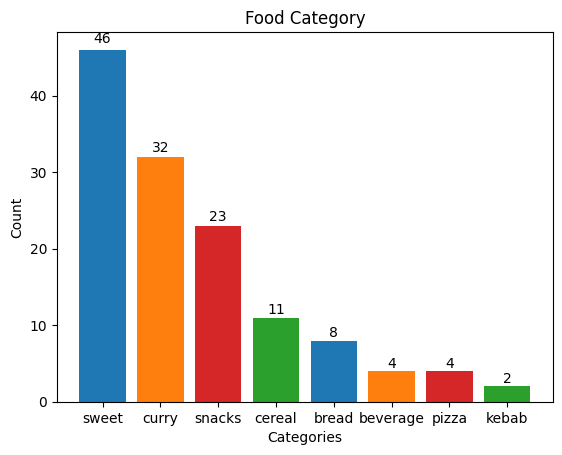

In [11]:
bar_plot = plt.bar(
    category_count.keys(), category_count.values(), 
    color=['tab:blue','tab:orange', 'tab:red', 'tab:green']
)
add_labels(bar_plot)

plt.title('Food Category')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.savefig('food_category1.png')
plt.show()

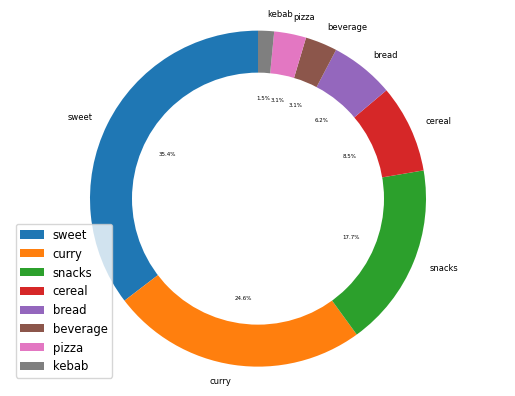

In [12]:
# 
plt.style.use('default')
wedges, texts, autotexts = plt.pie(
    x = category_count.values(), labels=category_count.keys(),
    autopct='%1.1f%%', startangle=90
    )

for text in texts:
    text.set_fontsize(6)
for autotext in autotexts:
    autotext.set_fontsize(4)

plt.axis('equal')
# plt.title('Food Category')
plt.legend(loc='best', fontsize='small')

circle = plt.Circle(xy=(0,0), radius=.75, facecolor='white')
plt.gca().add_artist(circle)

plt.savefig('food_category2.png')
plt.show()

In [13]:
samples_count = {}
for dirpath, dirnames, filenames in os.walk(loc1):
    # Count the number of files in the current directory (filenames list)
    if dirpath != loc1:
        samples_count[dirpath.split('\\')[1]] = len(filenames)
for dirpath, dirnames, filenames in os.walk(loc2):
    # Count the number of files in the current directory (filenames list)
    if dirpath != loc2:
        samples_count[dirpath.split('\\')[1]] += len(filenames)
samples_count

{'aloo_gobi': 1057,
 'aloo_matar': 399,
 'aloo_methi': 175,
 'aloo_paratha': 3155,
 'aloo_shimla_mirch': 46,
 'aloo_tikki': 49,
 'amritsari_kulcha': 267,
 'anda_curry': 3248,
 'ariselu': 96,
 'balushahi': 179,
 'banana_chips': 170,
 'bandar_laddu': 44,
 'basundi': 47,
 'besan_laddu': 483,
 'bhindi_masala': 648,
 'biryani': 6688,
 'boondi': 43,
 'boondi_laddu': 226,
 'butter_chicken': 48,
 'chaas': 999,
 'chak_hao_kheer': 37,
 'cham_cham': 44,
 'chana_masala': 2923,
 'chapati': 2288,
 'chicken_pizza': 3014,
 'chicken_razala': 50,
 'chicken_tikka': 26,
 'chicken_tikka_masala': 50,
 'chicken_wings': 2545,
 'chikki': 249,
 'chivda': 277,
 'chole_bhature': 1215,
 'daal_baati_churma': 44,
 'daal_puri': 44,
 'dabeli': 928,
 'dal_khichdi': 1252,
 'dal_makhani': 46,
 'dal_tadka': 47,
 'dharwad_pedha': 33,
 'dhokla': 1211,
 'double_ka_meetha': 47,
 'dum_aloo': 46,
 'falooda': 2483,
 'fish_curry': 1553,
 'gajar_ka_halwa': 406,
 'garlic_bread': 5668,
 'gavvalu': 40,
 'ghevar': 344,
 'grilled_sandw

In [14]:
len(samples_count.keys()), sum(samples_count.values())

(131, 135334)

In [15]:
samples_count = dict(sorted(
    samples_count.items(), key=lambda item: item[1], reverse=True
))

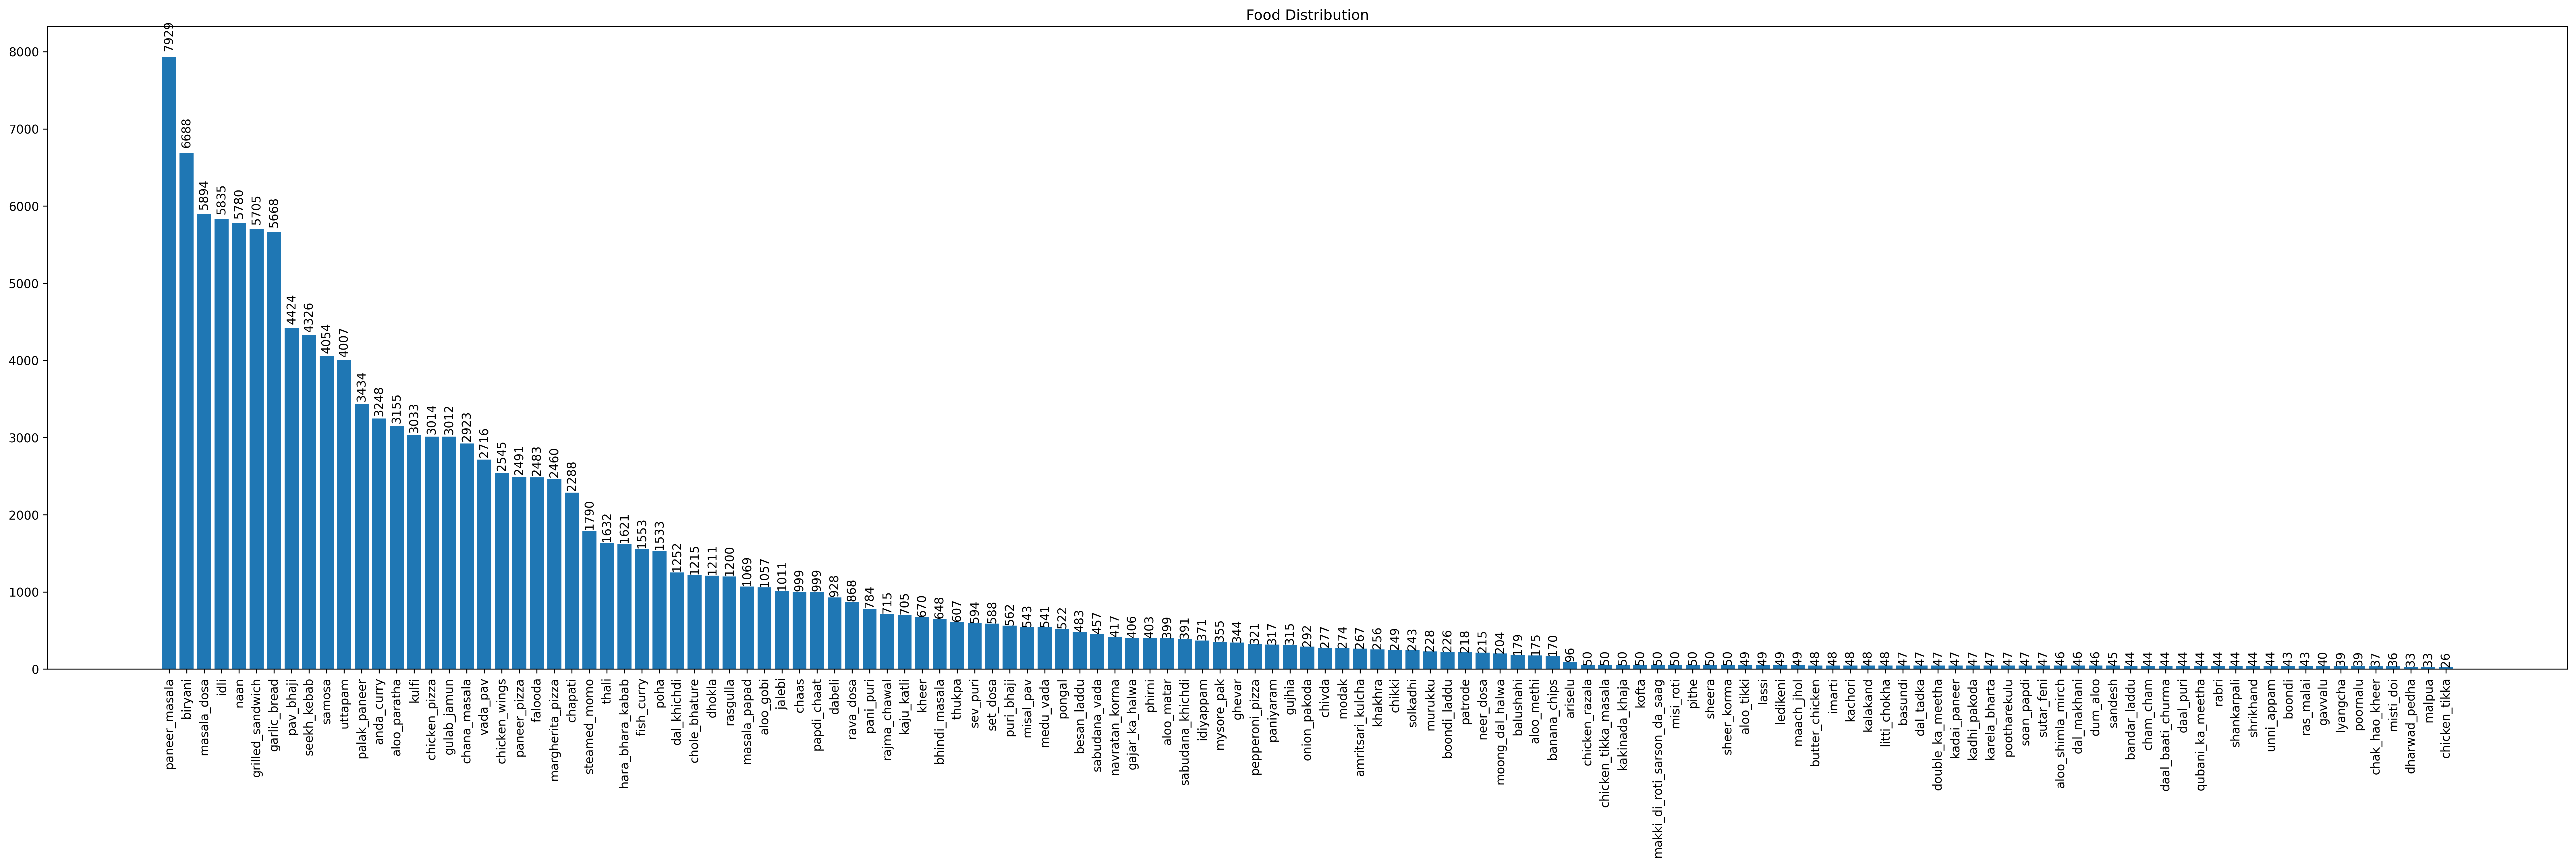

In [16]:
##
plt.figure(figsize=(30, 10), dpi=300)
bar_plot1 = plt.bar(
    samples_count.keys(), samples_count.values(), 
    color=['tab:blue']
)
add_labels(bar_plot1, r='vertical')
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.title('Food Distribution')

plt.savefig('food_distribution.png', format='png', bbox_inches='tight', dpi=300)
plt.show()

In [17]:
sorted(samples_count)

['aloo_gobi',
 'aloo_matar',
 'aloo_methi',
 'aloo_paratha',
 'aloo_shimla_mirch',
 'aloo_tikki',
 'amritsari_kulcha',
 'anda_curry',
 'ariselu',
 'balushahi',
 'banana_chips',
 'bandar_laddu',
 'basundi',
 'besan_laddu',
 'bhindi_masala',
 'biryani',
 'boondi',
 'boondi_laddu',
 'butter_chicken',
 'chaas',
 'chak_hao_kheer',
 'cham_cham',
 'chana_masala',
 'chapati',
 'chicken_pizza',
 'chicken_razala',
 'chicken_tikka',
 'chicken_tikka_masala',
 'chicken_wings',
 'chikki',
 'chivda',
 'chole_bhature',
 'daal_baati_churma',
 'daal_puri',
 'dabeli',
 'dal_khichdi',
 'dal_makhani',
 'dal_tadka',
 'dharwad_pedha',
 'dhokla',
 'double_ka_meetha',
 'dum_aloo',
 'falooda',
 'fish_curry',
 'gajar_ka_halwa',
 'garlic_bread',
 'gavvalu',
 'ghevar',
 'grilled_sandwich',
 'gujhia',
 'gulab_jamun',
 'hara_bhara_kabab',
 'idiyappam',
 'idli',
 'imarti',
 'jalebi',
 'kachori',
 'kadai_paneer',
 'kadhi_pakoda',
 'kaju_katli',
 'kakinada_khaja',
 'kalakand',
 'karela_bharta',
 'khakhra',
 'kheer',
 '

In [18]:
for i in sorted(samples_count):
    print(samples_count[i])

1057
399
175
3155
46
49
267
3248
96
179
170
44
47
483
648
6688
43
226
48
999
37
44
2923
2288
3014
50
26
50
2545
249
277
1215
44
44
928
1252
46
47
33
1211
47
46
2483
1553
406
5668
40
344
5705
315
3012
1621
371
5835
48
1011
48
47
47
705
50
48
47
256
670
50
3033
49
49
48
39
49
50
33
2460
5894
1069
541
543
50
36
274
204
228
355
5780
417
215
292
3434
7929
2491
784
317
999
218
4424
321
403
50
1533
522
39
47
562
44
44
715
43
1200
868
391
457
4054
45
4326
588
594
44
50
50
44
47
243
1790
47
1632
607
44
4007
2716


In [19]:
df = pd.read_csv('dataset_taxonomy.csv')
df.head()

,dish,category,samples
0,aloo_gobi,curry,1057
1,aloo_matar,curry,399
2,aloo_methi,curry,175
3,aloo_paratha,curry,3155
4,aloo_shimla_mirch,curry,46


C:\Users\sahas11\AppData\Local\Temp\ipykernel_28020\1543046869.py:7: DeprecationWarning:


Support for the 'engine' argument is deprecated and will be removed after September 2025.
Kaleido will be the only supported engine at that time.




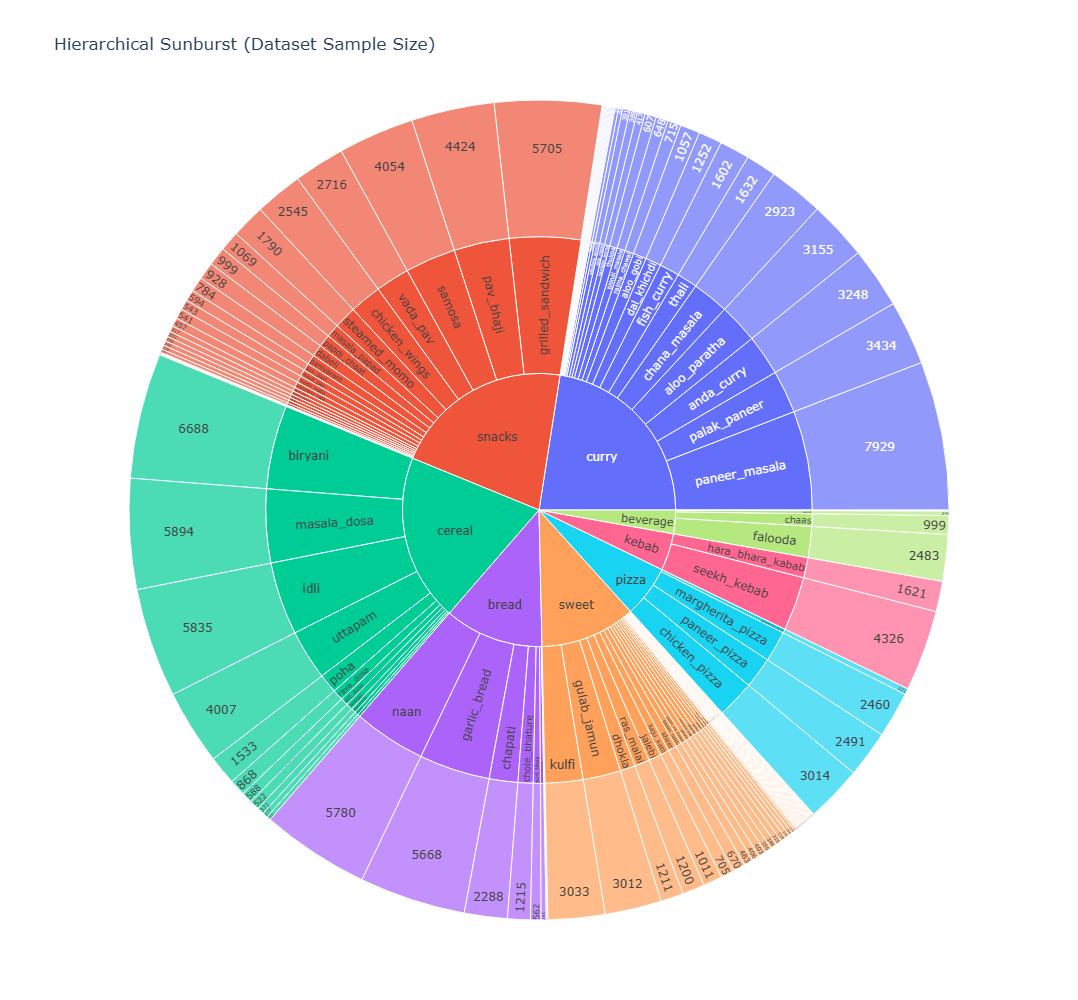

In [23]:
fig = px.sunburst(df,
                  path=["category", "dish", "samples"],
                  values='samples',
                  width=1000, height=1000,
                  title="Hierarchical Sunburst (Dataset Sample Size)",
                  )
fig.write_image('food_hier_sunburst.png', format='png', engine='kaleido')
fig.show()

In [11]:
import os
import math
from PIL import Image, ImageOps
import random

In [2]:
# for i, j, k in os.walk(loc1):
#     print(i, j, k)
#     break

In [8]:
loc3 = "./data_samples"
# os.listdir(loc3)

In [13]:
def create_collage_from_folder(folder_path, output_filename="indfood_collage.jpg", thumbnail_size=(200, 200), padding=5):
    # 1. Gather all image paths
    image_paths = []
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
            image_paths.append(os.path.join(folder_path, filename))
    
    if not image_paths:
        print(f"No images found in {folder_path}")
        return

    num_images = len(image_paths)
    
    # 2. Determine grid dimensions (closest to a square)
    # The number of columns is the smallest integer multiple of the image count
    cols = math.ceil(math.sqrt(num_images))
    rows = math.ceil(num_images / cols)
    
    # 3. Create the new blank canvas
    # Calculate the total width and height including padding
    total_width = cols * thumbnail_size[0] + (cols + 1) * padding
    total_height = rows * thumbnail_size[1] + (rows + 1) * padding
    collage = Image.new('RGB', (total_width, total_height), color='white') # White background

    # 4. Randomize the list
    random.shuffle(image_paths)
    
    # 5. Process and paste each image
    x_offset = padding
    y_offset = padding
    for index, img_path in enumerate(image_paths):
        try:
            img = Image.open(img_path)
            # Use ImageOps.fit to resize and crop while maintaining aspect ratio
            img = ImageOps.fit(img, thumbnail_size, Image.Resampling.LANCZOS)
            
            # Calculate position in the grid
            row = index // cols
            col = index % cols
            
            x = col * (thumbnail_size[0] + padding) + padding
            y = row * (thumbnail_size[1] + padding) + padding
            
            collage.paste(img, (x, y))
            
        except IOError:
            print(f"Could not process image {img_path}")

    # 6. Save the final collage
    collage.save(output_filename)
    print(f"Collage saved as {output_filename}")


create_collage_from_folder(loc3, thumbnail_size=(150, 150), padding=10)

Collage saved as indfood_collage.jpg
